# Analyzing the available data

In this notebook I check the available data from booking. As input I only use the fraction which has been splitted already and is the new train file. First I want to get a better understanding of the countries of both bookers and hotels.

I start with the bookers. I want to find out which is the country distribution, so I create a dataframe which contains only the booker country and the utrip_id. Since I don't want to count the same trip more than once I will drop duplicates.

In [1]:
#first I import pandas and perform some basic checks
import pandas as pd
train = pd.read_csv("NewTrain.csv")


In [2]:
#Create a list with only booker_country and utrip_id
train[["booker_country","utrip_id"]]

,booker_country,utrip_id
0,Gondal,1006220_1
1,Gondal,1006220_1
2,Gondal,1006220_1
3,Gondal,1006220_1
4,The Devilfire Empire,1010293_1
...,...,...
701222,Gondal,987787_1
701223,The Devilfire Empire,999755_1
701224,The Devilfire Empire,999755_1
701225,The Devilfire Empire,999755_1


In [3]:
#remove duplicates --> so for example the first trip which had 4 different stays will be reduced to just one.
train[["booker_country","utrip_id"]].drop_duplicates(keep = "first")

,booker_country,utrip_id
0,Gondal,1006220_1
4,The Devilfire Empire,1010293_1
10,Gondal,1012680_1
14,Gondal,1017326_1
18,Elbonia,103011_1
...,...,...
701198,Gondal,966493_1
701203,Elbonia,97967_1
701213,Gondal,986445_1
701218,Gondal,987787_1


### Booker_country
This is the quantity of bookers by country. Only 5 countries are considered!

As shown below, the same happens with the full booking_train_set. Thus considering the booker_country as part of the feature vector could be useful.

In [4]:
NT_booker_country = train[["booker_country","utrip_id"]].drop_duplicates(keep = "first").groupby(by = ["booker_country"]).booker_country.count()

In [5]:
full_train = pd.read_csv("../booking_train_set.csv")

In [6]:
full_test = pd.read_csv("../booking_test_set.csv")

In [7]:
#Check the list ob booker country --> just 5
list(full_train.booker_country.unique())

['Gondal', 'The Devilfire Empire', 'Elbonia', 'Tcherkistan', 'Bartovia']

In [8]:
#As expected, the same happens to the full_test
list(full_test.booker_country.unique())

['Gondal', 'The Devilfire Empire', 'Bartovia', 'Elbonia', 'Tcherkistan']

#### Show the booker_country distribution for New Train

<AxesSubplot:ylabel='booker_country'>

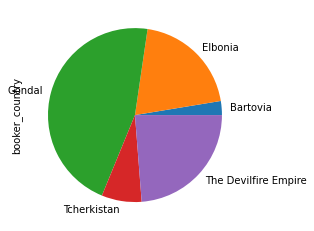

In [9]:
import matplotlib
NT_booker_country.plot(kind = "pie")

In [10]:
NT_booker_country.sort_values(ascending=False, inplace=True)

In [11]:
NT_booker_country

booker_country
Gondal                  60458
The Devilfire Empire    31159
Elbonia                 26330
Tcherkistan              9746
Bartovia                 3406
Name: booker_country, dtype: int64

In [12]:
NT_booker_country.sum()

131099

### Hotel_country


In [13]:
NT_hotel_country = train[["hotel_country","utrip_id"]].drop_duplicates(keep = "first").groupby(by = ["hotel_country"]).hotel_country.count()

In [14]:
NT_hotel_country.sort_values(ascending=False,inplace=True)

In [15]:
#Check the total quantity of countries containing hotels that are listed
len(train.hotel_country.unique())

193

In [16]:
NT_hotel_country

hotel_country
Gondal          19820
Fook Island     17855
Cobra Island    14159
Elbonia         11627
Glubbdubdrib    11494
                ...  
Nuevo Rico          1
San Serriffe        1
Caledonia           1
Sardovia            1
Markovia            1
Name: hotel_country, Length: 193, dtype: int64

In [17]:
NT_hotel_country.sum()

185108

In [18]:
(NT_hotel_country/NT_hotel_country.sum()).head(25)

hotel_country
Gondal                    0.107073
Fook Island               0.096457
Cobra Island              0.076490
Elbonia                   0.062812
Glubbdubdrib              0.062093
Kangan                    0.034688
Dawsbergen                0.032495
Borginia                  0.030928
Bozatta                   0.029485
Carpathia                 0.028697
Alvonia                   0.027633
Holy Britannian Empire    0.021193
Axphain                   0.020696
Santa Prisca              0.017449
Leutonia                  0.016963
Carjackistan              0.016077
Drusselstein              0.014192
Kasnia                    0.013533
Patusan                   0.013419
Rolisica                  0.013187
Sylvania                  0.012242
Nevoruss                  0.012079
Osterlich                 0.011156
Bartovia                  0.010805
Nova Africa               0.010502
Name: hotel_country, dtype: float64

In [19]:
(NT_hotel_country/NT_hotel_country.sum()).head(25).sum()

0.7923428484992545

##### Comment on Hotel_Country
So there are 193 countries present in the dataset. It might be an option to take some of these as variables when we feed data and put a "rest" for all others.
As shown above, the top 25 countries already account for almost 80% of the destinations.

Another approach could be to use complex logic such as:
- for the top cities use an unique index
- for the non top cities use the same index

With this approach the hotel_country is ignored.


<b><font color='grey'>Possible task</font><br></b>
There might be countries which are strongly connected. For example European countries might be visited at once by American or Asian tourists (but not by Europeans).
Finding these sort of relationships could be a funny task, although maybe not directly related to the booking challenge?

<b><font color='grey'>Possible task</font></b>
- Average stay in each country?





In [20]:
train.head(30)

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
5,5,1010293,2016-07-10,2016-07-11,55,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
6,6,1010293,2016-07-12,2016-07-13,23921,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
7,7,1010293,2016-07-13,2016-07-15,65322,desktop,9924,The Devilfire Empire,Cobra Island,1010293_1
8,8,1010293,2016-07-15,2016-07-16,23921,desktop,9924,The Devilfire Empire,Cobra Island,1010293_1
9,9,1010293,2016-07-16,2016-07-17,20545,desktop,10573,The Devilfire Empire,Cobra Island,1010293_1


## Filtering data: same city in one trip
With the following code lines I filter the dataframe, removing those rows which contain the same city_id and utrip_id as the last row, since these shouldn't be considered as two different stations but as the same one

In [21]:
train["trip_previous_row"]=  train.utrip_id.shift(periods=1, freq=None, axis=0, fill_value=None)

In [22]:
train.head(5)

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,trip_previous_row
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,NaN
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1006220_1


In [23]:
train["city_previous_row"]=  train.city_id.shift(periods=1, freq=None, axis=0, fill_value=None)

In [24]:
mask1 = train.city_previous_row == train.city_id

In [25]:
mask2 = train.utrip_id == train.trip_previous_row

In [26]:
len(train)


701227

In [27]:
train_filtered = train.loc[~(mask1&mask2)]

In [28]:
len(train_filtered)

650218

In [29]:
train_filtered

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,trip_previous_row,city_previous_row
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,NaN,NaN
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1006220_1,31114.0
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,1006220_1,39641.0
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1006220_1,20232.0
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1006220_1,24144.0
...,...,...,...,...,...,...,...,...,...,...,...,...
701222,1166826,987787,2016-08-24,2016-08-27,63650,tablet,9924,Gondal,Glubbdubdrib,987787_1,987787_1,30520.0
701223,1166831,999755,2016-12-13,2016-12-16,4476,desktop,2661,The Devilfire Empire,Gondal,999755_1,987787_1,63650.0
701224,1166832,999755,2016-12-16,2016-12-17,1034,desktop,7974,The Devilfire Empire,Gondal,999755_1,999755_1,4476.0
701225,1166833,999755,2016-12-22,2016-12-25,64876,desktop,7974,The Devilfire Empire,Fook Island,999755_1,999755_1,1034.0


In [30]:
train_filtered=train_filtered.drop(columns=["trip_previous_row","city_previous_row"])

In [31]:
train_filtered

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
...,...,...,...,...,...,...,...,...,...,...
701222,1166826,987787,2016-08-24,2016-08-27,63650,tablet,9924,Gondal,Glubbdubdrib,987787_1
701223,1166831,999755,2016-12-13,2016-12-16,4476,desktop,2661,The Devilfire Empire,Gondal,999755_1
701224,1166832,999755,2016-12-16,2016-12-17,1034,desktop,7974,The Devilfire Empire,Gondal,999755_1
701225,1166833,999755,2016-12-22,2016-12-25,64876,desktop,7974,The Devilfire Empire,Fook Island,999755_1


In [32]:
train_filtered.to_csv("filtered_train.csv")

In [33]:
train_filtered

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
...,...,...,...,...,...,...,...,...,...,...
701222,1166826,987787,2016-08-24,2016-08-27,63650,tablet,9924,Gondal,Glubbdubdrib,987787_1
701223,1166831,999755,2016-12-13,2016-12-16,4476,desktop,2661,The Devilfire Empire,Gondal,999755_1
701224,1166832,999755,2016-12-16,2016-12-17,1034,desktop,7974,The Devilfire Empire,Gondal,999755_1
701225,1166833,999755,2016-12-22,2016-12-25,64876,desktop,7974,The Devilfire Empire,Fook Island,999755_1


### Check how many stays there are in each utrip_id and related infos
Next, I want to check how many stays there are in each trip. I think a first approach I will do is to simply train an RNN on small trips of 4 or 5 stays. Maybe even of 4, 5 and 6 stays while using padding, but in any case a fixed input size.
This would be just a first step to approach the solution with an RNN and see if it works good or not.

In [34]:
#How many stays there are in each trip
utripstays=train_filtered.groupby(by = "utrip_id").utrip_id.count()

In [35]:
utripstays

utrip_id
1000027_1    4
1000045_1    7
100008_1     5
1000097_1    9
1000136_1    5
            ..
999377_1     7
999612_1     4
99967_1      4
999755_1     4
999839_1     4
Name: utrip_id, Length: 130887, dtype: int64

In [36]:
utripstays.rename("stays",inplace=True)

utrip_id
1000027_1    4
1000045_1    7
100008_1     5
1000097_1    9
1000136_1    5
            ..
999377_1     7
999612_1     4
99967_1      4
999755_1     4
999839_1     4
Name: stays, Length: 130887, dtype: int64

In [37]:
#now make a vlookup
train_filtered=train_filtered.merge(utripstays,how="left", on = "utrip_id")

In [38]:
train_filtered

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,stays
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,4
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,4
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,4
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,6
...,...,...,...,...,...,...,...,...,...,...,...
650213,1166826,987787,2016-08-24,2016-08-27,63650,tablet,9924,Gondal,Glubbdubdrib,987787_1,5
650214,1166831,999755,2016-12-13,2016-12-16,4476,desktop,2661,The Devilfire Empire,Gondal,999755_1,4
650215,1166832,999755,2016-12-16,2016-12-17,1034,desktop,7974,The Devilfire Empire,Gondal,999755_1,4
650216,1166833,999755,2016-12-22,2016-12-25,64876,desktop,7974,The Devilfire Empire,Fook Island,999755_1,4


##### More information about the stays
Check how the distribution of stays is

In [39]:
#these are the length of trips in the dataset
utripstays.sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 39, 40],
      dtype=int64)

In [40]:
counts=utripstays.value_counts()

In [41]:
counts.sort_index(ascending=True,inplace=True)

In [42]:
counts

1      3022
2      3216
3     11063
4     51751
5     26200
6     14359
7      8403
8      4983
9      2923
10     1887
11     1138
12      734
13      422
14      286
15      167
16      107
17       61
18       41
19       31
20       27
21       15
22       14
23       10
24       10
25        2
26        3
27        2
29        1
30        1
31        1
32        3
39        3
40        1
Name: stays, dtype: int64

In [43]:
import seaborn as sns
sns.set(font_scale=2,palette="viridis")

In [44]:
counts_top=counts[0:11]

In [45]:
counts_top["12+"]=counts.sum()-counts_top.sum()

In [46]:
counts_top

1       3022
2       3216
3      11063
4      51751
5      26200
6      14359
7       8403
8       4983
9       2923
10      1887
11      1138
12+     1942
Name: stays, dtype: int64

In [47]:
counts_top.iloc[11]

1942

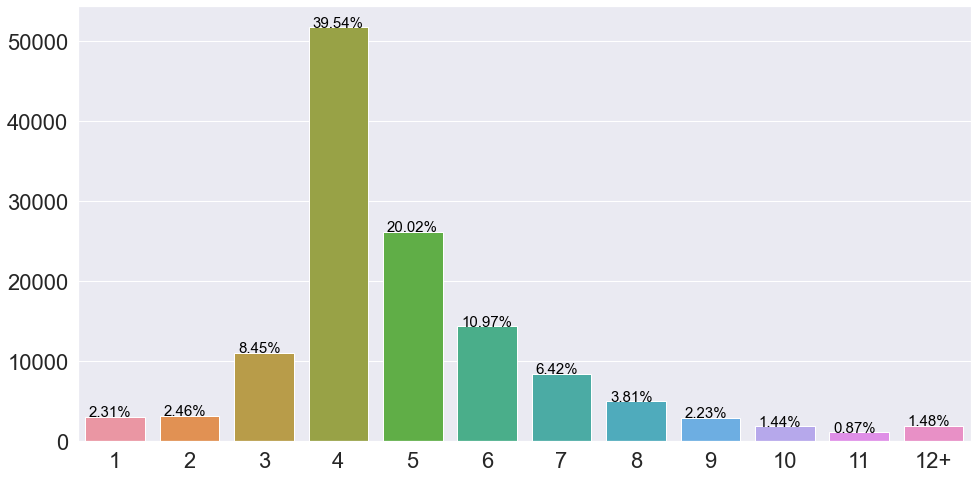

In [48]:
import seaborn as sns
from matplotlib import pyplot as plt


#set size and style of the graph
fig, ax = plt.subplots()
sns.set(font_scale=2,palette="viridis")
fig.set_size_inches(16,8)
graph=sns.barplot(x=counts_top.index,y=counts_top.values)

i=1
while i<=counts_top.count():
    text=f"{(100*counts_top.iloc[i-1]/counts_top.sum()).round(2)}%"
    graph.text(s=text,color="black",size=15,x=i-1.35,y=counts_top.iloc[i-1]+50)
    i=i+1
plt.show()

#### Conclusion trip size
As expected, most of the trips have few stops being 4 the most common followed by 5 and 6. These 3 categories contain 70% of the stays. Just 1.48% have 12 or more stays.

This confirms that taking just stays with 4 stays or combining 4 to 6 stays could yield acceptable first results. First I will get only those trips 4 stays because it will be easier to use just one size for the RNN.

In [49]:
train_filtered

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,stays
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,4
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,4
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,4
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,6
...,...,...,...,...,...,...,...,...,...,...,...
650213,1166826,987787,2016-08-24,2016-08-27,63650,tablet,9924,Gondal,Glubbdubdrib,987787_1,5
650214,1166831,999755,2016-12-13,2016-12-16,4476,desktop,2661,The Devilfire Empire,Gondal,999755_1,4
650215,1166832,999755,2016-12-16,2016-12-17,1034,desktop,7974,The Devilfire Empire,Gondal,999755_1,4
650216,1166833,999755,2016-12-22,2016-12-25,64876,desktop,7974,The Devilfire Empire,Fook Island,999755_1,4


In [50]:
Just4stays=train_filtered.loc[train_filtered.stays == 4]

In [51]:
Just4stays

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,stays
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,4
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,4
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,4
10,10,1012680,2016-10-23,2016-10-25,37709,desktop,384,Gondal,Yerba,1012680_1,4
...,...,...,...,...,...,...,...,...,...,...,...
650177,1166780,964047,2016-04-29,2016-05-01,34788,desktop,4541,Gondal,Halla,964047_2,4
650214,1166831,999755,2016-12-13,2016-12-16,4476,desktop,2661,The Devilfire Empire,Gondal,999755_1,4
650215,1166832,999755,2016-12-16,2016-12-17,1034,desktop,7974,The Devilfire Empire,Gondal,999755_1,4
650216,1166833,999755,2016-12-22,2016-12-25,64876,desktop,7974,The Devilfire Empire,Fook Island,999755_1,4


In [52]:
Just4stays["length"]=pd.to_datetime(Just4stays["checkout"])-pd.to_datetime(Just4stays["checkin"])

C:\Users\Fischer\anaconda3\envs\BookingChallenge\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
Just4stays

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,stays,length
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,4,2 days
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,4,1 days
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4,4 days
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,4,1 days
10,10,1012680,2016-10-23,2016-10-25,37709,desktop,384,Gondal,Yerba,1012680_1,4,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...
650177,1166780,964047,2016-04-29,2016-05-01,34788,desktop,4541,Gondal,Halla,964047_2,4,2 days
650214,1166831,999755,2016-12-13,2016-12-16,4476,desktop,2661,The Devilfire Empire,Gondal,999755_1,4,3 days
650215,1166832,999755,2016-12-16,2016-12-17,1034,desktop,7974,The Devilfire Empire,Gondal,999755_1,4,1 days
650216,1166833,999755,2016-12-22,2016-12-25,64876,desktop,7974,The Devilfire Empire,Fook Island,999755_1,4,3 days


In [54]:
Just4stays["Step"]=1

C:\Users\Fischer\anaconda3\envs\BookingChallenge\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
(Just4stays.iloc[0,9])

'1006220_1'

In [57]:
Just4stays

,Index,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,stays,length,Step
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,4,2 days,1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,4,1 days,1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4,4 days,1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,4,1 days,1
10,10,1012680,2016-10-23,2016-10-25,37709,desktop,384,Gondal,Yerba,1012680_1,4,2 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
650177,1166780,964047,2016-04-29,2016-05-01,34788,desktop,4541,Gondal,Halla,964047_2,4,2 days,1
650214,1166831,999755,2016-12-13,2016-12-16,4476,desktop,2661,The Devilfire Empire,Gondal,999755_1,4,3 days,1
650215,1166832,999755,2016-12-16,2016-12-17,1034,desktop,7974,The Devilfire Empire,Gondal,999755_1,4,1 days,1
650216,1166833,999755,2016-12-22,2016-12-25,64876,desktop,7974,The Devilfire Empire,Fook Island,999755_1,4,3 days,1


In [58]:
#Couldn't find a faster way than doing a loop through the entire dataset
#shame on me, I know :(
i=1
enddataset=len(Just4stays)-1
while i <= enddataset:
    if Just4stays.iloc[i,9]==Just4stays.iloc[i-1,9]:
        Just4stays.iloc[i,12]=Just4stays.iloc[i-1,12]+1
    i = i +1

C:\Users\Fischer\anaconda3\envs\BookingChallenge\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [59]:

Just4stays_cities=Just4stays.loc[:,["city_id","utrip_id","Step"]]

In [60]:
Sequenced4stays=Just4stays_cities.set_index(["utrip_id","Step"]).unstack()

In [61]:
len(Sequenced4stays)

51751

In [62]:
Sequenced4stays

city_id                     
Step            1      2      3      4
utrip_id                              
1000027_1    8183  15626  60902  30628
1000241_1   30768   1673  28006  28319
1000472_1   51135    343  12308  64824
1000482_1   44603  15343  60222   4932
1000643_1   56485  27015  58903  62185
...           ...    ...    ...    ...
999341_2     8938  37947  51299   9699
999612_1    58178  20281  38475  17357
99967_1     66648  18417  30520  66648
999755_1     4476   1034  64876   9608
999839_1     8335  21328   8335  48968

[51751 rows x 4 columns]

## Going to KERAS!!!
Yeah, so finally I got the input formatted the way I wanted. I will convert this now to numpy array and the input will be ready for the neural network.

<b>Important</b><br>
First I tried to replace the city indexes because many are not used. But I wasn't able to do it so instead I used a much larger input shape to the RNN and many values will never show up.

In [64]:
#I get the total quantity of unique cities in the entire, full train set given by booking.com
total_cities=len(full_train.city_id.unique())

#Corrected because of the important comment mentioned above
total_cities =full_train.city_id.max()

In [65]:
total_cities

67565

In [66]:
citymapper=full_train.city_id.unique()

In [67]:
type(citymapper)

numpy.ndarray

In [68]:
citymapper=pd.DataFrame(citymapper)

In [69]:
citymapper["city"]=citymapper.index

In [70]:
citymapper.set_index(0)

,city
0,
31114,0
39641,1
20232,2
24144,3
5325,4
...,...
45515,39896
33845,39897
28858,39898


In [71]:
citymapper.columns=["Original_Index","Reduced_index"]

In [72]:
citymapper.set_index("Original_Index",inplace=True)

In [73]:
citymapper

,Reduced_index
Original_Index,
31114,0
39641,1
20232,2
24144,3
5325,4
...,...
45515,39896
33845,39897
28858,39898


In [74]:
#Create a deep copy to avoid messing up with original data!
#So I can perform chagnes in these values without risk of affecting the original data
Sequenced4stays_New_Index = Sequenced4stays.copy(deep=True)

In [75]:
Sequenced4stays_New_Index

city_id                     
Step            1      2      3      4
utrip_id                              
1000027_1    8183  15626  60902  30628
1000241_1   30768   1673  28006  28319
1000472_1   51135    343  12308  64824
1000482_1   44603  15343  60222   4932
1000643_1   56485  27015  58903  62185
...           ...    ...    ...    ...
999341_2     8938  37947  51299   9699
999612_1    58178  20281  38475  17357
99967_1     66648  18417  30520  66648
999755_1     4476   1034  64876   9608
999839_1     8335  21328   8335  48968

[51751 rows x 4 columns]

In [76]:
dictCityMapper = citymapper.to_dict()

In [77]:
dictCityMapper

{'Reduced_index': {31114: 0,
  39641: 1,
  20232: 2,
  24144: 3,
  5325: 4,
  55: 5,
  23921: 6,
  65322: 7,
  20545: 8,
  37709: 9,
  11837: 10,
  19626: 11,
  62270: 12,
  1979: 13,
  3531: 14,
  55529: 15,
  5860: 16,
  50957: 17,
  60222: 18,
  23612: 19,
  17013: 20,
  46794: 21,
  12884: 22,
  40875: 23,
  66657: 24,
  33667: 25,
  62185: 26,
  17568: 27,
  6701: 28,
  67371: 29,
  40565: 30,
  28053: 31,
  6196: 32,
  13621: 33,
  65679: 34,
  67353: 35,
  14145: 36,
  11531: 37,
  57167: 38,
  29770: 39,
  54603: 40,
  64960: 41,
  30458: 42,
  56590: 43,
  47499: 44,
  10485: 45,
  11783: 46,
  56268: 47,
  41772: 48,
  64876: 49,
  55128: 50,
  9608: 51,
  47752: 52,
  17127: 53,
  36063: 54,
  60153: 55,
  33204: 56,
  14843: 57,
  47378: 58,
  14827: 59,
  6788: 60,
  9879: 61,
  4660: 62,
  29319: 63,
  48483: 64,
  13861: 65,
  62135: 66,
  25025: 67,
  39820: 68,
  52818: 69,
  15337: 70,
  60274: 71,
  4790: 72,
  49412: 73,
  58683: 74,
  51103: 75,
  66966: 76,
  1521

In [78]:
Sequenced4stays_New_Index.replace(dictCityMapper)

city_id                     
Step            1      2      3      4
utrip_id                              
1000027_1    8183  15626  60902  30628
1000241_1   30768   1673  28006  28319
1000472_1   51135    343  12308  64824
1000482_1   44603  15343  60222   4932
1000643_1   56485  27015  58903  62185
...           ...    ...    ...    ...
999341_2     8938  37947  51299   9699
999612_1    58178  20281  38475  17357
99967_1     66648  18417  30520  66648
999755_1     4476   1034  64876   9608
999839_1     8335  21328   8335  48968

[51751 rows x 4 columns]

In [79]:
Sequenced4stays_New_Index

city_id                     
Step            1      2      3      4
utrip_id                              
1000027_1    8183  15626  60902  30628
1000241_1   30768   1673  28006  28319
1000472_1   51135    343  12308  64824
1000482_1   44603  15343  60222   4932
1000643_1   56485  27015  58903  62185
...           ...    ...    ...    ...
999341_2     8938  37947  51299   9699
999612_1    58178  20281  38475  17357
99967_1     66648  18417  30520  66648
999755_1     4476   1034  64876   9608
999839_1     8335  21328   8335  48968

[51751 rows x 4 columns]

In [80]:
RNN_Input=Sequenced4stays.to_numpy()

In [81]:
RNN_Input.shape

(51751, 4)

In [82]:
RNN_Input

array([[ 8183, 15626, 60902, 30628],
       [30768,  1673, 28006, 28319],
       [51135,   343, 12308, 64824],
       ...,
       [66648, 18417, 30520, 66648],
       [ 4476,  1034, 64876,  9608],
       [ 8335, 21328,  8335, 48968]], dtype=int64)

In [83]:
import keras

Using TensorFlow backend.


In [85]:
def create_model(total_cities, seq_len):
    model = keras.models.Sequential()
    model.add(keras.layers.Embedding(total_cities, 300, input_length=seq_len))
    model.add(keras.layers.LSTM(150, return_sequences=True))
    model.add(keras.layers.LSTM(150))
    model.add(keras.layers.Dense(150, activation='relu'))
    model.add(keras.layers.Dense(total_cities, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


In [86]:
X=RNN_Input[:,:-1]

In [87]:
y=RNN_Input[:,-1]

In [88]:
y=keras.utils.to_categorical(y,num_classes=total_cities+1)

In [89]:
model = create_model(total_cities+1, 3)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 300)            20269800  
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 150)            270600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 67566)             10202466  
Total params: 30,946,116
Trainable params: 30,946,116
Non-trainable params: 0
_________________________________________________________________


In [90]:
# fit model
model.fit(X, y, batch_size=128, epochs=30,verbose=1)


C:\Users\Fischer\anaconda3\envs\BookingChallenge\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/30
51751/51751 [==============================] - 69s 1ms/step - loss: 8.3801 - accuracy: 0.0144 3s - loss: 8.4042 - accuracy: 0.01 -
Epoch 2/30
51751/51751 [==============================] - 98s 2ms/step - loss: 7.4778 - accuracy: 0.0204A: 31s - loss: 7.5310 - accuracy: 0.0 - ETA: 3 - ETA: 20s - 
Epoch 3/30
51751/51751 [==============================] - 92s 2ms/step - loss: 6.7664 - accuracy: 0.0749 3s - loss: 6.7771 - accuracy: 0.07 - ETA: 3s - l
Epoch 4/30
51751/51751 [==============================] - 85s 2ms/step - loss: 5.8960 - accuracy: 0.1320
Epoch 5/30
51751/51751 [==============================] - 99s 2ms/step - loss: 5.1674 - accuracy: 0.1738
Epoch 6/30
51751/51751 [==============================] - 86s 2ms/step - loss: 4.6297 - accuracy: 0.2000
Epoch 7/30
51751/51751 [==============================] - 72s 1ms/step - loss: 4.2023 - accuracy: 0.2262
Epoch 8/30
51751/51751 [==============================] - 73s 1ms/step - loss: 3.8235 - accuracy: 0.2492 2s - loss: 3.8

In [91]:
# Save the model
# Uncomment to store the model just generated
#model.save('Epoch30Model.h5')


In [92]:
#Now creating test data to check the quality of the model
test = pd.read_csv("NewTest.csv")

In [104]:
test["trip_previous_row"]=  test.utrip_id.shift(periods=1, freq=None, axis=0, fill_value=None)
test.head(5)

test["city_previous_row"]=  test.city_id.shift(periods=1, freq=None, axis=0, fill_value=None)

mask1 = test.city_previous_row == test.city_id

mask2 = test.utrip_id == test.trip_previous_row

test_filtered = test.loc[~(mask1&mask2)]

#How many stays there are in each trip
utripstays_test=test_filtered.groupby(by = "utrip_id").utrip_id.count()
utripstays_test.rename("stays",inplace=True)


#now make a vlookup
test_filtered=test_filtered.merge(utripstays_test,how="left", on = "utrip_id")

Just4stays_test=test_filtered.loc[test_filtered.stays == 4]

Just4stays_test["Step"]=1


#Couldn't find a faster way than doing a loop through the entire dataset
i=1
enddataset=len(Just4stays_test)-1
while i <= enddataset:
    if Just4stays_test.iloc[i,9]==Just4stays_test.iloc[i-1,9]:
        Just4stays_test.iloc[i,13]=Just4stays_test.iloc[i-1,13]+1
    i = i +1

Just4stays_test_cities=Just4stays_test.loc[:,["city_id","utrip_id","Step"]]
Sequenced4stays_test=Just4stays_test_cities.set_index(["utrip_id","Step"]).unstack()

C:\Users\Fischer\anaconda3\envs\BookingChallenge\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Fischer\anaconda3\envs\BookingChallenge\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [105]:
model.evaluate(X,y,verbose=2)

[0.5355708330684817, 0.8406600952148438]

In [106]:
model.metrics_names

['loss', 'accuracy']

In [107]:

RNN_Validation_Data=Sequenced4stays_test.to_numpy()
X_predict=RNN_Validation_Data[:,:-1]
y_predict=RNN_Validation_Data[:,-1]
y_predict=keras.utils.to_categorical(y_predict,num_classes=total_cities+1)

In [108]:
model.evaluate(X_predict,y_predict,verbose=2)

[19.291758488762834, 0.1791841685771942]

## Result
The accuracy obtained with the RNN is of 17,9%. 
<br>
<br>

#### Overfitting
After 30 epochs training the result obtained was around 80% so it is clear that the model is highly overfitted. Additional epochs don't make sense, thus. 
Possible task/exploration test:
- repeat the test with less epochs
- repeat the test with more epochs

Q. Do the results improve/worsen?

<br>
<br>

#### Training done with 4-trips-stays only
To get a first result I had to focus only on trips with 4 stays. I expect that if we adapt the code in order to make it compatible with trips of different lengths the results will be worse. For example, if the trip length is of 2, we remove then the second destination and predicting it is more complicated due to the variety of trip types.

However, I haven't found out yet how to train a model with multiple input length.

Next task:
- Investigate how a model can be configured that consideres multiple input length. 
This is in my opinion the key next step since it allows us to train it on much more data. Also, the results will be worse (but closer to reality) and then we can focus on improving it.

No idea now how to do it. Need to google it.

<br>
<br>

#### 4 predictions instead of 1
So far, the model does only one single prediction. But the bookingchallenge allows 4 predictions and if any of them match the real y then the predictions are good.

Next task:
- Implement 4 predictions for the evaluation
- Implement 4 predictions for the training phase

No idea now how to do it. Need to google it.


<br>
<br>

#### Pro: Complex model
If both previous steps are done, we can attempt to code a complex model. This model is a Sequential model which takes into account only the previous cities. But nothing else! 

Booking gives us much more! Country of origin surely is relevant, stay length. For example if one stays 7 days in Florence the tourist might make one-day trips to Pisa, Siena, etc. and visit the surroundings. So it might not be relevant to suggest him to book there the next destination and instead of that suggest Rome or Venice.

To input this information to the model requires a complex NN. I think sequential models can't be used and that instead we have to use Keras Functional API https://keras.io/guides/functional_api/

But to be honest I have no idea if it is done with that. I think of something like using two inputs, one like a sequence of stays and one containing information about the stays, the booker, etc.


<br>
<br>

#### Fine tuning
When we have a good model, we can try to improve it by fine tuning!